In [15]:
load("../DM2018/vrawu17.RData")

In [19]:
head(vrawu17)
colnames(vrawu17)

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,...,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
,XN,LTG,0,SCDA,SBEG,201708131500,8484,2017-08-13 15:20:00,NA,...,DIEGO ARACENA INTERNATIONAL AIRPORT,IQUIQUE,NA,CHILE,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XB,TPA,0,SBCT,KMIA,201708130900,843,2017-08-13 09:00:00,NA,...,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,TAMPA S/A,ESTRANGEIRA,AUTORIZADO,NA
,NA,LTG,0,SVMI,SBEG,201708132100,8472,2017-08-13 21:42:00,2017-08-13 23:46:00,...,SIMON BOLIVAR INTERNATIONAL AIRPORT (MAIQUETIA INTERNATIONAL AIRPORT),CARACAS/INTL,NA,VENEZUELA,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,NA,NA
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,...,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,...,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,LTG,0,SGES,SGAS,201708130800,8443,2017-08-13 08:00:00,NA,...,GUARANI INTERNATIONAL AIRPORT,CIDADE DEL ESTE,NA,PARAGUAI,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA


[1] "codigo_tipo_linha"       "cod_justificativa"      
 [3] "icao_empresa"            "codigo_di"              
 [5] "icao_destino"            "icao_origem"            
 [7] "timekey_partida"         "voo"                    
 [9] "partida_prevista"        "partida_real"           
[11] "chegada_prevista"        "chegada_real"           
[13] "situacao_voo"            "timekey_chegada"        
[15] "atraso_partida"          "atraso_chegada"         
[17] "origem_data"             "origem_hora"            
[19] "origem_temperatura"      "origem_dew_point"       
[21] "origem_umidade"          "origem_pressao"         
[23] "origem_visibilidade"     "origem_eventos"         
[25] "origem_condicoes"        "destino_data"           
[27] "destino_hora"            "destino_temperatura"    
[29] "destino_dew_point"       "destino_umidade"        
[31] "destino_pressao"         "destino_visibilidade"   
[33] "destino_eventos"         "destino_condicoes"      
[35] "origem_descricao"        "origem_cidade"          
[37] "origem_uf"               "origem_pais"            
[39] "origem_continente"       "destino_descricao"      
[41] "destino_cidade"          "destino_uf"             
[43] "destino_pais"            "destino_continente"     
[45] "descricao_codigo_di"     "empresa"                
[47] "nacionalidade"           "descricao_justificativa"
[49] "tipo_linha"

In [42]:
#library("MASS")
#library("RColorBrewer")
#library("gridExtra")
#library("GGally")

#install.packages("MASS")
#install.packages("RColorBrewer")
#install.packages("gridExtra")
#install.packages("GGally")

library(ggplot2)
library(scales)
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")

### Densidade de distribuição de atraso de partida com relação aos continentes

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
Warning message:
"Removed 175560 rows containing non-finite values (stat_density)."

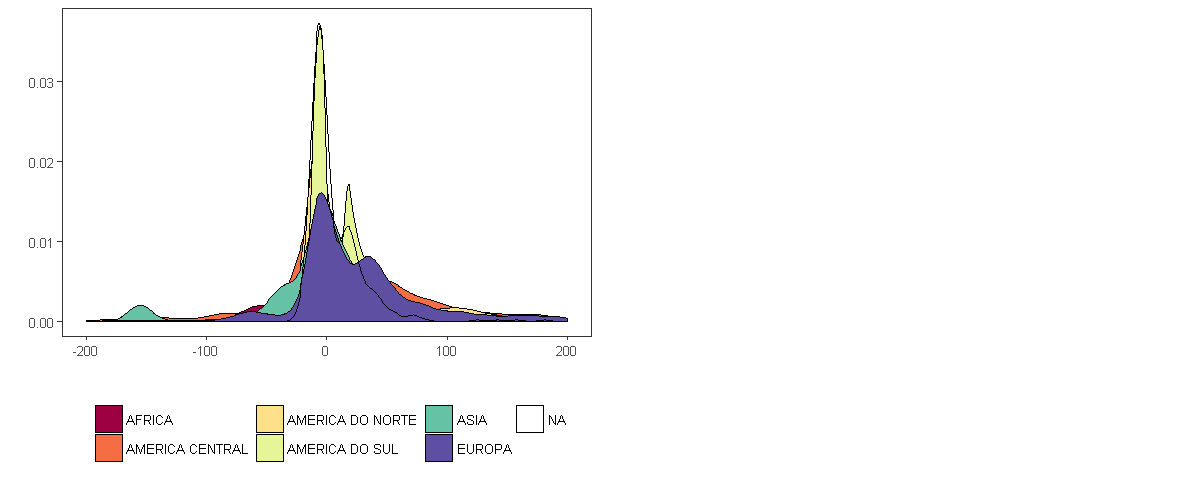

In [91]:
col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9,11)]

value=vrawu17[vrawu17$atraso_partida >=-200 & vrawu17$atraso_partida <=200 & vrawu17$atraso_partida != 0 ,]
series <- data.frame(variable=value$destino_continente, value=value$atraso_partida)
grfB <- plot.density(series, colors=mycolors)

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange( grfB, ncol=2)

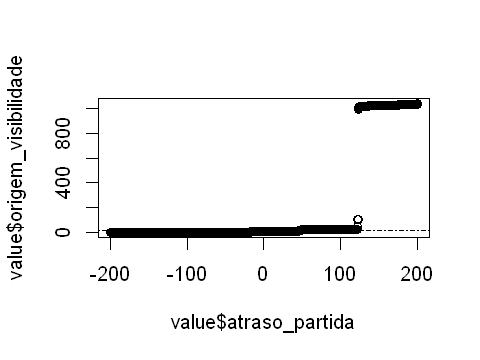

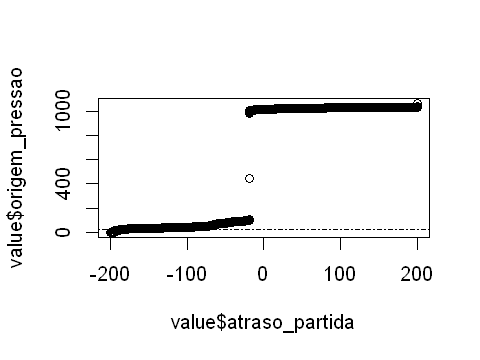

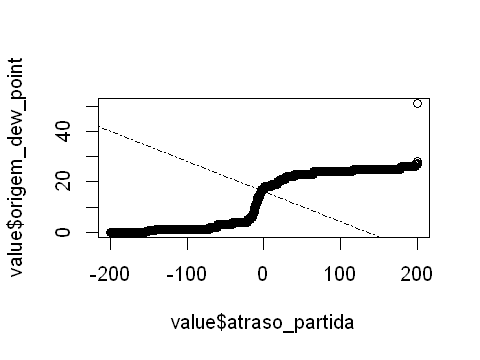

In [93]:
options(repr.plot.width=4, repr.plot.height=3)
qqplot(value$atraso_partida, value$origem_visibilidade)
fm <- lm(value$atraso_partida ~ value$origem_visibilidade)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(value$atraso_partida, value$origem_pressao)
fm <- lm(value$atraso_partida ~ value$origem_pressao)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(value$atraso_partida, value$origem_dew_point)
fm <- lm(value$atraso_partida ~ value$origem_dew_point)
abline(coef(fm), lty=4)